##Multi-Layer Perceptron
In this project, you will practice what we have been working with all first course. You will implement a multi-layer perceptron for a classification task. This model (MLP) will learn to classify  the content of an image (object in an image), our images are taken from the MNIST dataset. The MNIST database has images of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

To build MPL neural network, you will use MLPClassifier in sklearn library.

## Steps


### 1) First, Imports 
let’s import all the packages  will be needing:

In [ ]:
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from time import time
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix

import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')


### 2) Download the Dataset MNIST from keras datasets repos
and load the images into splits train and test

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

**Exercise** 
Check: 
- the size each train dataset and test dataset
- How much percent represent train and test dataset of original dataset ? 
- size of image

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
Y_test.shape

(10000,)

In [ ]:
df_balance_percent = (X_train.shape[0] * X_train.shape[1] * X_train.shape[2])/(X_train.shape[0] * X_train.shape[1] * X_train.shape[2] + X_test.shape[0] * X_test.shape[1] * X_test.shape[2])
df_balance_percent

0.8571428571428571

In [ ]:
nb_pictures = X_train.shape[0] + X_test.shape[0]
nb_pictures

70000

Now, Since The model is 1D layers, so the data images must be converted from 2D to 1D, so we need to use reshape function 


**Exercise**  Convert 2D dataset to 1D

**Tips**

Number of images stays as it is for x_train, and x_test
the new 1D shape of 2D image is the reult of multiplication of width and height 

so if we know the original dimensions by: 
nsamples, nx, ny = X_train.shape

Use X_train.reshape(? ) to find the new dimensions

In [ ]:
'''# complete the code
nsamples, nx, ny = ?   # for train dataset
X_train_ = ?'''
nsamples, nx, ny = X_train.shape
X_train_ = X_train.reshape((nsamples, nx*ny))

'''nsamples, nx, ny = ?  #for train dataset
X_test_ = ?'''

nsamples, nx, ny = X_test.shape
X_test_ = X_test.reshape((nsamples, nx*ny))


In [ ]:
#verify the shape after reshaping to 1D
X_train_.shape

(60000, 784)

**Exercise** 
Using the *matplotlib.pyplot* plot some images from x_train, and display their corresponding label from y_train

<Figure size 640x480 with 0 Axes>

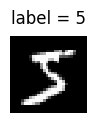

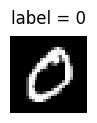

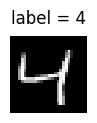

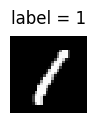

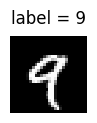

In [ ]:
import matplotlib.pyplot as plt

plt.gray() 

for i in range(5):
  fig, ax = plt.subplots(figsize=(1,1))
  ax.matshow(X_train[i]) 
  plt.title("label = "+str(Y_train[i]))
  ax.axis('off')
plt.show()

## Training MLP 

Using built-in MLPClassifier function, you will train your model. This function has few parameters to be tuned to affect the performance of training. Right now, we will set only parameter of ieteration, and leaving the rest to get the default values.

In [ ]:
mlp = MLPClassifier(verbose=True, max_iter=50)
st = time()
mlp.fit(X_train_, Y_train)
end = time() - st

print('elapsed time in seconds', end)


Iteration 1, loss = 3.31637242
Iteration 2, loss = 0.77647799
Iteration 3, loss = 0.45563393
Iteration 4, loss = 0.33746154
Iteration 5, loss = 0.27260337
Iteration 6, loss = 0.22442895
Iteration 7, loss = 0.18783966
Iteration 8, loss = 0.16421048
Iteration 9, loss = 0.15145756
Iteration 10, loss = 0.14014979
Iteration 11, loss = 0.12793070
Iteration 12, loss = 0.12489182
Iteration 13, loss = 0.12308069
Iteration 14, loss = 0.11134676
Iteration 15, loss = 0.10208319
Iteration 16, loss = 0.10849520
Iteration 17, loss = 0.10456090
Iteration 18, loss = 0.10700660
Iteration 19, loss = 0.09169266
Iteration 20, loss = 0.08881433
Iteration 21, loss = 0.08485334
Iteration 22, loss = 0.08025851
Iteration 23, loss = 0.07728575
Iteration 24, loss = 0.07879231
Iteration 25, loss = 0.07470828
Iteration 26, loss = 0.07215369
Iteration 27, loss = 0.07866115
Iteration 28, loss = 0.07708976
Iteration 29, loss = 0.06309354
Iteration 30, loss = 0.06669450
Iteration 31, loss = 0.06268334
Iteration 32, los

## Evaluation 
Now, you need to evaluate the accuracy of your model and validate it on test data 


Use the function *accuracy_score* from *sklearn.metrics*: 
- to caluculate the accuracy on train dataset
- to caluculate the accuracy on test dataset

In [ ]:
from sklearn.metrics import accuracy_score

acc_tr = accuracy_score(Y_train, mlp.predict(X_train_)) # which data ? explain this line
acc_ts = accuracy_score(Y_test, mlp.predict(X_test_)) # which data ? explain this line

print("training accuracy:", acc_tr)
print("Test accuracy:",acc_ts)

# explain the results

training accuracy: 0.98795
Test accuracy: 0.9613


There are many other metrics to evaluate the performance of a model, please check *[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)*

**Exercise**

Could you read and learn more about those different meatrics, and what are the differences between them ? 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, mlp.predict(X_test_)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.97      0.98      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Plot the LEARNING CURVE

As seen during training, the error (loss) has been decreasing, all values of loss are saved in a structure of the model, called loss_curve_, you can access it as 
mlp.loss_curve_

- Could you plot training loss values as a curve ? 

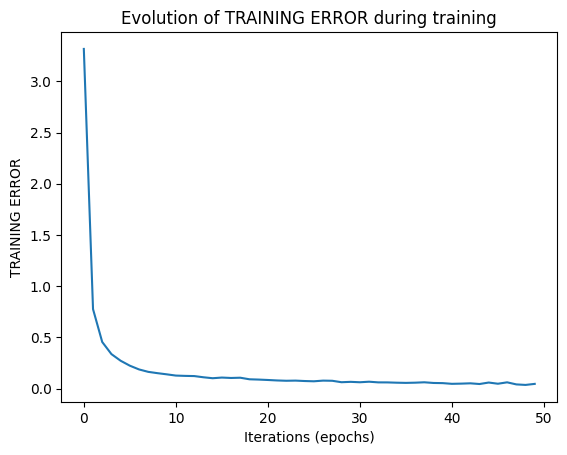

In [ ]:
import matplotlib.pyplot as plt
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()


##Benchmark 1


To get the best performance of *MLPClassifier*, you have to benchmark the classifier with different combinations of parameters to fall on the optimal combination of parameter values corresponding the best performance

Start with two parameters: 
1.   variation on alpha param: alpha is a learning rate, that you may consider it as a factor to improve learning, we will take it in details in the next course
2.   variation on the iterations number

**Tips** 
consider the following values of each parameter

alphas = [0.0001,0.001, 0.1, 10]

max_iter = [10,100,200]



In [ ]:
i = 0
alphas = [0.0001,0.001, 0.1, 10]
max_iter = [10,100,200]
df = pd.DataFrame(columns = ['alpha','max_iter','acc_train','acc_test','train_estim'])
# train with all possible alphas and max inter 
        
for a in alphas:
    for mi in max_iter:
        st = time()
        print('alpha = ',a, 'max_iter=',mi)
        mlp = MLPClassifier(alpha=a, max_iter=mi)
        mlp.fit(X_train_, Y_train)
        end = time() - st
        
        acc_tr = accuracy_score(Y_train, mlp.predict(X_train_)) # Train Accuracy
        acc_ts = accuracy_score(Y_test, mlp.predict(X_test_)) # Test Accuracy
        df.loc[i] = [a,mi,acc_tr,acc_ts,end]
        i=i+1

alpha =  0.0001 max_iter= 10
alpha =  0.0001 max_iter= 100
alpha =  0.0001 max_iter= 200
alpha =  0.001 max_iter= 10
alpha =  0.001 max_iter= 100
alpha =  0.001 max_iter= 200
alpha =  0.1 max_iter= 10
alpha =  0.1 max_iter= 100
alpha =  0.1 max_iter= 200
alpha =  10 max_iter= 10
alpha =  10 max_iter= 100
alpha =  10 max_iter= 200


In [ ]:
df.sort_values(["acc_test"], ascending=False) # Results


,alpha,max_iter,acc_train,acc_test,train_estim
2,0.0001,200.0,0.994833,0.9661,149.063017
1,0.0001,100.0,0.993833,0.9649,153.098377
4,0.0010,100.0,0.995483,0.9645,155.639117
8,0.1000,200.0,0.987600,0.9639,89.149441
11,10.0000,200.0,0.969967,0.9632,51.003253
5,0.0010,200.0,0.994233,0.9627,170.869135
9,10.0000,10.0,0.967383,0.9598,16.281613
10,10.0000,100.0,0.965633,0.9568,124.546376
7,0.1000,100.0,0.981883,0.9558,109.151009
6,0.1000,10.0,0.967400,0.9480,16.989255


##Benchmark 2

After finiding the best max_iterations and best alpha, 
1.   Use them to do a second benchmark to find the number of nodes in hidden layer which make the performance optimal 
2.   You can plot a curve of accuracy which is function of number of nodes ==> *acc = f(Nodes_Num)* 
3.   Please Comment your results.


In [ ]:

Nodes_Num = [10,20,50,100,400,1000]
acc_tr = [] # to stock all training acc of each training on a new node num
acc_ts = [] # to stock all test acc of each test on a new node num
timelog = []

for nn in Nodes_Num:
  st = time()
  print('numbers of nodes = ',nn)
  mlp = MLPClassifier(alpha=0.001, max_iter=200, hidden_layer_sizes= (nn, ) )
  mlp.fit(X_train_, Y_train)
  end = time() - st
  timelog.append(end)
  
  acc_train = accuracy_score(Y_train, mlp.predict(X_train_)) # Train Accuracy
  acc_tr.append(acc_train)
  acc_test = accuracy_score(Y_test, mlp.predict(X_test_)) # Test Accuracy
  acc_ts.append(acc_test)
  

numbers of nodes =  10
numbers of nodes =  20
numbers of nodes =  50
numbers of nodes =  100
numbers of nodes =  400
numbers of nodes =  1000


In [ ]:
acc_tr

[0.9320833333333334,
 0.9617833333333333,
 0.9873666666666666,
 0.9940333333333333,
 0.9980166666666667,
 0.9969]

In [ ]:
acc_ts

[0.9175, 0.9376, 0.9483, 0.9671, 0.9782, 0.9779]

In [ ]:
d = {'Nb of Nodes':Nodes_Num,'Accuracy train':acc_tr,'Accuracy test':acc_ts, 'Runtime':timelog}
df_Bench2 = pd.DataFrame(d)
df_Bench2.sort_values(by=['Accuracy test'], ascending=False)

,Nb of Nodes,Accuracy train,Accuracy test,Runtime
4,400,0.998017,0.9782,354.373474
5,1000,0.996900,0.9779,706.796428
3,100,0.994033,0.9671,179.647910
2,50,0.987367,0.9483,181.996170
1,20,0.961783,0.9376,277.585488
0,10,0.932083,0.9175,128.169945


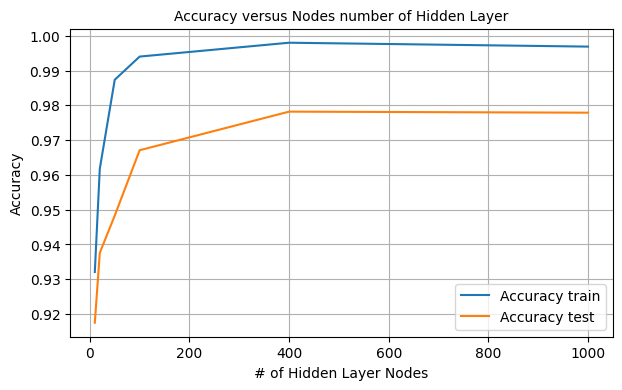

In [ ]:
#define your range of x axis 
# code here your stuff to plot curve of accuracy values  
df_Bench2.plot(x = "Nb of Nodes", y = ['Accuracy train', "Accuracy test"], kind="line", figsize=(7, 4), grid= True)

plt.xlabel("# of Hidden Layer Nodes")
plt.ylabel("Accuracy")
plt.legend(loc ='lower right')
plt.title('Accuracy versus Nodes number of Hidden Layer', fontsize=10)
plt.show()